# Projekt 3
Autor Michał Powroźnik 198076, Patryk Polechoński 197861

Importy do programów pythonowych
Funkcja do wyświetlania obrazu

In [1]:
import scikit_build_example
from IPython.display import Image
from IPython.display import SVG, display
import wave 
import struct 
import numpy as np
import time

#funkcja wyswietlajaca obrazek
def disp(filename):
  time.sleep(1)
  display(SVG(filename=filename))

#### Wczytanie pliku sample.wav


In [2]:
def read_wave(filename: str):  
  with wave.open(filename) as f:         
      rate = f.getframerate()
      frames = f.getnframes()
      duration = frames / float(rate)
      sampwidth = f.getsampwidth()
      print(f"duration:{duration} rate:{rate} frames:{frames} sampwidth:{sampwidth} chanels:{f.getnchannels()}")
      
      #czytamy 30 sek
      frames_to_read = round(rate * 0.3)
      if f.getnframes()*f.getnchannels() < frames_to_read:
            print(f"Plik {filename} jest krótszy niż 60 sek.")
            frames_to_read = f.getnframes()
    
      data = f.readframes(frames_to_read)         
      samples = list(struct.unpack('{n}h'.format(n=frames_to_read*f.getnchannels()), data) )   
      aa = samples[0::f.getnchannels()]#czytamy tylko kanał 0
      arr = np.array(aa) 
  return arr, rate

data, frame_rate = read_wave('sample.wav')


duration:2.4 rate:44100 frames:105840 sampwidth:2 chanels:2


### Wizualizacja pliku Wav

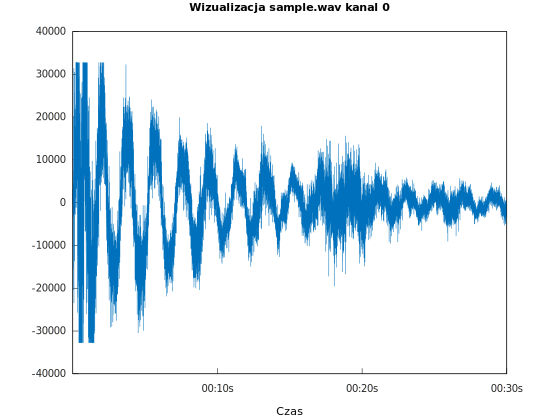

In [3]:
scikit_build_example.plot_wave_to_file(data,"Wizualizacja sample.wav kanal 0" , "wave.svg",frame_rate)
disp("wave.svg")

## Transformata DFT
Sposób 1


C:\Users\micha\AppData\Local\Temp\ipykernel_17616\1065118842.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  scikit_build_example.plot_inne(dft_result,"Transformata DFT" , "dft.svg")


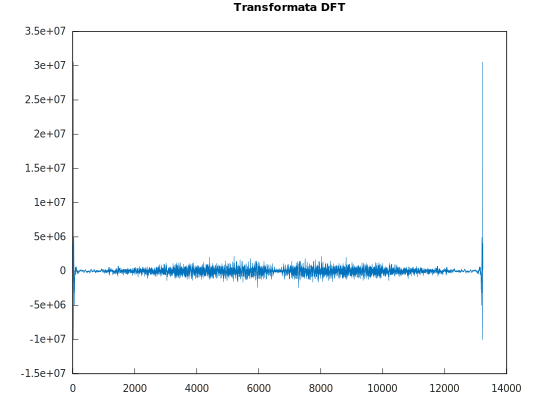

In [4]:
def perform_dft(signal, sample_rate):
    
    N = len(signal)
    n = np.arange(N)    
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    dft_result = np.dot(e, signal)

    # uzycie wbudowanej biblioteki w celu sprwawdzenia algorytmu
    freq = np.fft.rfftfreq(len(signal), 1/sample_rate)

    return freq, dft_result

freq, dft_result = perform_dft(data, frame_rate)  

scikit_build_example.plot_inne(dft_result,"Transformata DFT" , "dft.svg")
disp("dft.svg")


Sposób 2 (własny)

C:\Users\micha\AppData\Local\Temp\ipykernel_17616\2664478288.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  scikit_build_example.plot_inne(X,"Transformata DFT czestotliwosci" , "dft_1a.svg" )


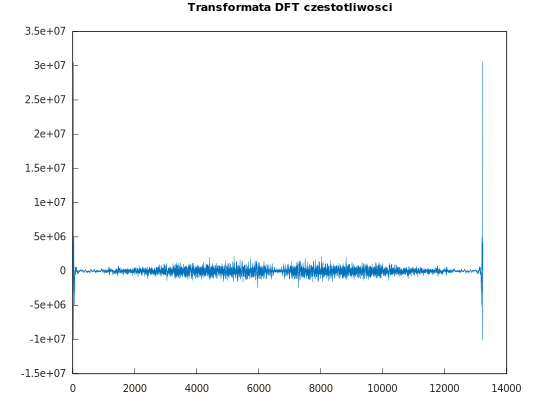

In [5]:

N = len(data)
k = np.arange(N)
M = np.exp(-2j * np.pi * k[:, None] * k / N)
X = np.matmul(data, M)

scikit_build_example.plot_inne(X,"Transformata DFT czestotliwosci" , "dft_1a.svg" )
disp("dft_1a.svg")

Użycie biblioteki scipy w celu zweryfikowania poprawności algorytmu

C:\Users\micha\AppData\Local\Temp\ipykernel_17616\3311578041.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  scikit_build_example.plot_inne(X,"Transformata DFT czestotliwosci" , "dft_1b.svg" )


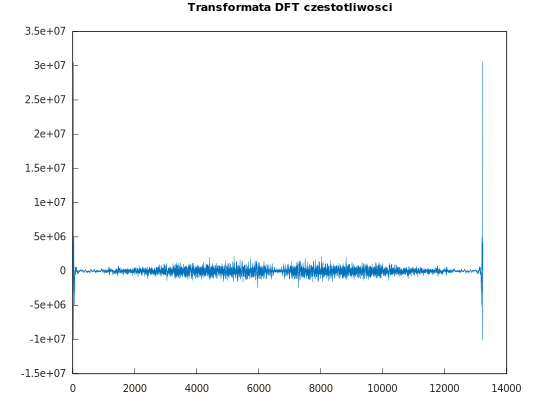

In [6]:

import scipy.linalg as sl
M = sl.dft(N)
X = np.matmul(data, M)

scikit_build_example.plot_inne(X,"Transformata DFT czestotliwosci" , "dft_1b.svg" )
disp("dft_1b.svg")

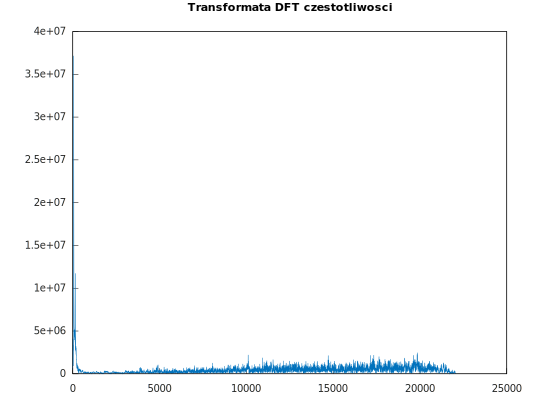

In [7]:
fft_spectrum = np.fft.rfft(data)
fft_spectrum_abs = np.abs(fft_spectrum)

scikit_build_example.plot_wave3(freq,fft_spectrum_abs,"Transformata DFT czestotliwosci" , "dft_2.svg" )
disp("dft_2.svg")

C:\Users\micha\AppData\Local\Temp\ipykernel_17616\2143013003.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  scikit_build_example.plot_wave_to_file(idft_result,"Transformata odwrotna DFT" , "idft.svg", frame_rate)


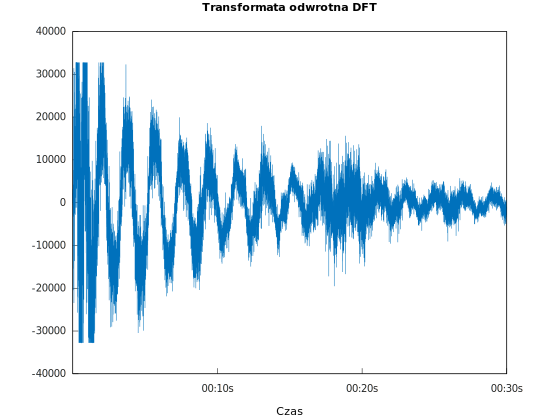

In [8]:
def perform_idft(dft_result):
    
    N = len(dft_result)
    n = np.arange(N)   
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    idft_result = np.dot(e, dft_result) / N

    return idft_result

idft_result = perform_idft(dft_result)

scikit_build_example.plot_wave_to_file(idft_result,"Transformata odwrotna DFT" , "idft.svg", frame_rate)
disp("idft.svg")

## Filtr 1D

In [9]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, lfilter, filtfilt

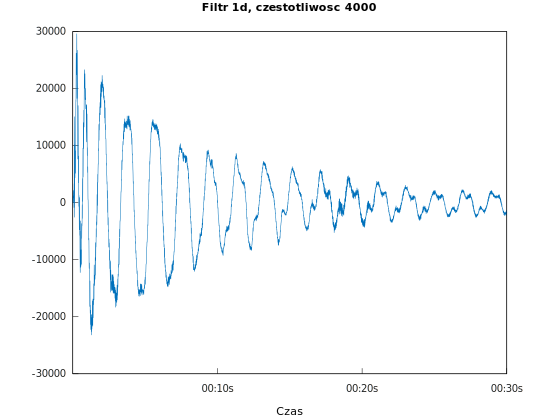

In [10]:
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter_1d(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


cutoff=4000
order=5
filtered_data = lowpass_filter_1d(data, cutoff, frame_rate, order)

scikit_build_example.plot_wave_to_file(filtered_data,f"Filtr 1d, czestotliwosc {cutoff}" , "1d.svg", frame_rate)
disp("1d.svg")

## Filtr 2d

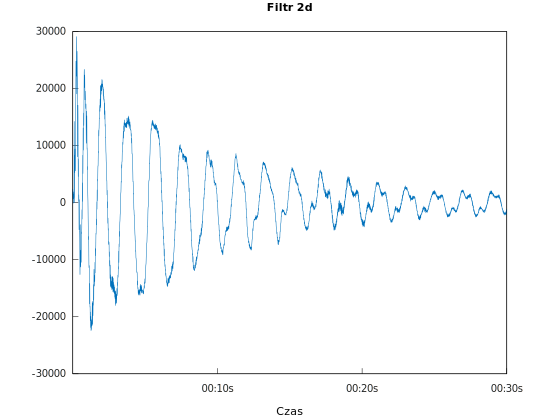

In [11]:

def lowpass_filter_2d(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = np.apply_along_axis(lambda m: filtfilt(b, a, m), axis=-1, arr=data)
    return y

filtered_data = lowpass_filter_2d(data, cutoff, frame_rate, order)

scikit_build_example.plot_wave_to_file(filtered_data,"Filtr 2d" , "2d.svg", frame_rate)
disp("2d.svg")

## Funkcja sin

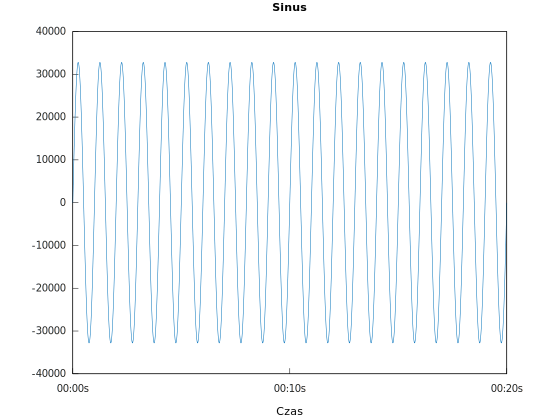

In [12]:
fs = 5000

amplitude = 1 
frequency = 1 
duration = 20 

t = np.linspace(0, duration, int(fs * duration), endpoint=False)
wave = amplitude * np.sin(2 * np.pi * frequency * t)

max_amplitude = np.iinfo(np.int16).max
data_normalized = (wave * max_amplitude).astype(np.int16)


scikit_build_example.plot_wave_to_file(data_normalized,"Sinus" , "sinus.svg", fs*100)
disp("sinus.svg")

## Funkcja piłokształtna

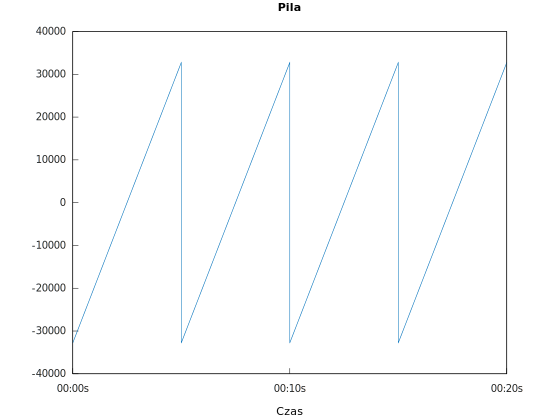

In [13]:
from scipy import signal
frequency = 0.2
wave = amplitude * signal.sawtooth(2 * np.pi * frequency * t)

data_normalized = (wave * max_amplitude).astype(np.int16)

scikit_build_example.plot_wave_to_file(data_normalized,"Pila" , "trojkat2.svg", fs*100)
disp("trojkat2.svg")

## Funkcja trójkątna

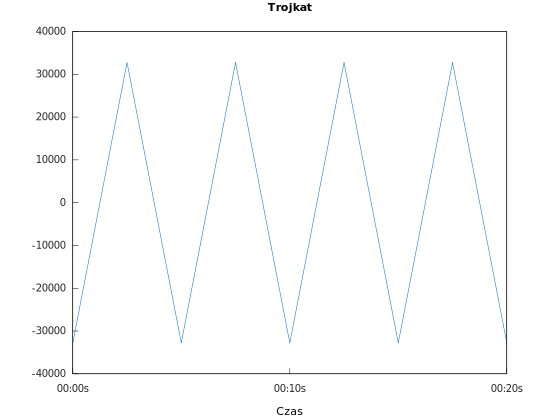

In [14]:
from scipy import signal
frequency = 0.2
wave = amplitude * signal.sawtooth(2 * np.pi * frequency * t, 0.5)

data_normalized = (wave * max_amplitude).astype(np.int16)

scikit_build_example.plot_wave_to_file(data_normalized,"Trojkat" , "trojkat.svg", fs*100)
disp("trojkat.svg")

## Funkcja prostokątna

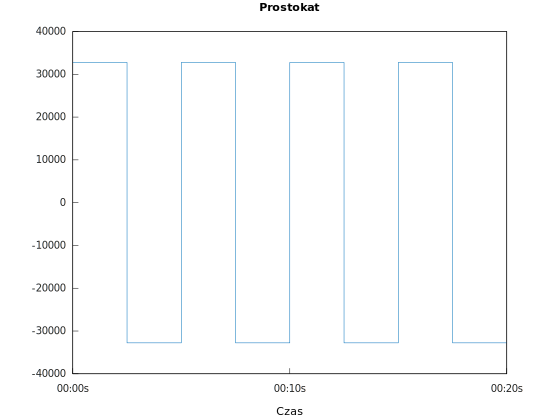

In [15]:
from scipy import signal
frequency = 0.2
wave = amplitude * signal.square(2 * np.pi * frequency * t, 0.5)

data_normalized = (wave * max_amplitude).astype(np.int16)

scikit_build_example.plot_wave_to_file(data_normalized,"Prostokat" , "prostokat.svg", fs*100)
disp("Prostokat.svg")